In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
premium = pd.read_excel("spotify_data_premium_users.xlsx")
free = pd.read_excel("spotify_data_free_users.xlsx")


In [10]:
premium.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_context,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,classical,Night,Relaxation and stress relief,While Traveling,"recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
1,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,classical,Night,Relaxation and stress relief,Workout session,"recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
2,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,classical,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
3,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,classical,Night,Uplifting and motivational,While Traveling,"recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
4,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,classical,Night,Uplifting and motivational,Workout session,"recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied


In [11]:
free.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_context,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,Study Hours,Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,While Traveling,Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
4,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,Office hours,"recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok


In [12]:
for col in premium.select_dtypes(include = ['object']).columns:
    print(f'\n == {col} ==')
    print(premium[col].unique())


 == Age ==
['20-35' '12-20' '6-12' '35-60']

 == Gender ==
['Female' 'Male' 'Others']

 == spotify_usage_period ==
['More than 2 years' '6 months to 1 year' '1 year to 2 years'
 'Less than 6 months']

 == spotify_listening_device ==
['Smartphone, Computer or laptop, Smart speakers or voice assistants'
 'Smartphone, Computer or laptop'
 'Smartphone, Smart speakers or voice assistants'
 'Computer or laptop, Wearable devices'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Computer or laptop' 'Smart speakers or voice assistants' 'Smartphone'
 'Wearable devices'
 'Computer or laptop, Smart speakers or voice assistants'
 'Computer or laptop, Smart speakers or voice assistants, Wearable devices']

 == spotify_subscription_plan ==
['Premium (paid subscription)']

 == premium_sub_willingness ==
['Yes' 'No']

 == preffered_premium_plan ==
['Individual Plan- Rs 119/ month' 'Family Plan-Rs 179/month'
 'Student Plan-Rs 59/month' nan 'Duo plan- Rs 149/mont

In [13]:
for col in free.select_dtypes(include = ['object']).columns:
    print(f'\n == {col} ==')
    print(free[col].unique())


 == Age ==
['20-35' '12-20' '35-60' '60+' '6-12']

 == Gender ==
['Female' 'Male' 'Others']

 == spotify_usage_period ==
['More than 2 years' '6 months to 1 year' '1 year to 2 years'
 'Less than 6 months']

 == spotify_listening_device ==
['Smart speakers or voice assistants' 'Computer or laptop'
 'Smartphone, Smart speakers or voice assistants' 'Smartphone'
 'Smartphone, Computer or laptop' 'Smartphone, Wearable devices'
 'Smartphone, Computer or laptop, Wearable devices' 'Wearable devices'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants'
 'Smartphone, Smart speakers or voice assistants, Wearable devices'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Computer or laptop, Smart speakers or voice assistants'
 'Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Smart speakers or voice assistants, Wearable devices'
 'Computer or laptop, Wearable devices']

 == spotify_subscription_plan ==
['Free (ad-

In [14]:
def encode_age(s):
    if pd.isna(s):
        return np.nan
    if '6-12' in s or '12-20' in s:
        return 1
    if '20-35' in s:
        return 2
    if '35-60' in s or '60+':
        return 3
#12-20 has 3 samples and 60+ only has 1 sample.To maintain sample balance, 
#the 6–12 and 12–20 age groups were merged into a single “young user” category, 
#and 60+ into a single "middle-aged and older adults” category.

def encode_gender(s):
    if pd.isna(s):
        return np.nan
    if 'Male' in s:
        return 0
    if 'Female' in s:
        return 1
    return 2
    
def encode_usage(s):
    if pd.isna(s):
        return np.nan
    if 'Less than 6 months' in s:
        return 0
    if '6 months to 1 year' in s:
        return 1
    if '1 year to 2 years' in s:
        return 2
    if 'More than 2 years' in s:
        return 3

def encode_plan(s):
    if pd.isna(s):
        return np.nan
    if 'Free (ad-supported)' in s:
        return 0
    if 'Premium (paid subscription)' in s:
        return 1

def encode_willing(s):
    if pd.isna(s):
        return np.nan
    if 'No' in s:
        return 0
    if 'Yes' in s:
        return 1

def encode_time_slot(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    mapping = {
        "Morning": 0,
        "Afternoon": 1,
        "Night": 2
    }
    return mapping.get(s, np.nan)

def encode_mood(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    mapping = {
        "Relaxation and stress relief": 0,
        "Uplifting and motivational": 1,
        "Sadness or melancholy": 2,
        "Social gatherings or parties": 3
    }
    return mapping.get(s, np.nan)

def encode_music_ctx(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    mapping = {
        "Random": 0,
        "Office hours": 1,
        "Study Hours": 2,
        "While Traveling": 3,
        "Workout session": 4,
        "Before bed": 5,
        "Night time": 6,
        "Social gatherings": 7,
        "leisure time": 8,
        "when cooking": 9
    }
    return mapping.get(s, np.nan)

In [16]:
def build_enc(df):
    enc = pd.DataFrame({
        "age": df["Age"].apply(encode_age),
        "gender": df["Gender"].apply(encode_gender),
        "usage_period": df["spotify_usage_period"].apply(encode_usage),
        #"plan_premium": df["spotify_subscription_plan"].apply(encode_plan),  # removed
        "will_premium": df["premium_sub_willingness"].apply(encode_willing),
        "time_slot": df["music_time_slot"].apply(encode_time_slot),
        "mood": df["music_Influencial_mood"].apply(encode_mood),
        "music_context": df["music_context"].apply(encode_music_ctx)
    })
    
    enc = enc.dropna()
    return enc

premium_enc = build_enc(premium)
free_enc = build_enc(free)

In [17]:
print(premium_enc.isna().sum())

age              0
gender           0
usage_period     0
will_premium     0
time_slot        0
mood             0
music_context    0
dtype: int64


In [18]:
print(free_enc.isna().sum())

age              0
gender           0
usage_period     0
will_premium     0
time_slot        0
mood             0
music_context    0
dtype: int64


In [19]:
len(premium_enc)

357

In [20]:
len(free_enc)

1359

In [22]:
premium_enc.head()

,age,gender,usage_period,will_premium,time_slot,mood,music_context
0,2,1,3,1,2,0,3.0
1,2,1,3,1,2,0,4.0
2,2,1,3,1,2,0,8.0
3,2,1,3,1,2,1,3.0
4,2,1,3,1,2,1,4.0


In [24]:
scaler_prem = StandardScaler()
X_prem = scaler_prem.fit_transform(premium_enc)

In [27]:
K = range(2, 8)
sil_scores_prem = []

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_prem)
    score = silhouette_score(X_prem, labels)
    sil_scores_prem.append(score)

print("K values:", list(K))
print("Silhouette scores (Premium):", sil_scores_prem)

C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

K values: [2, 3, 4, 5, 6, 7]
Silhouette scores (Premium): [np.float64(0.2654755602244527), np.float64(0.22769268110687343), np.float64(0.2506832793181768), np.float64(0.254489067739704), np.float64(0.261306661034426), np.float64(0.2789532051652568)]


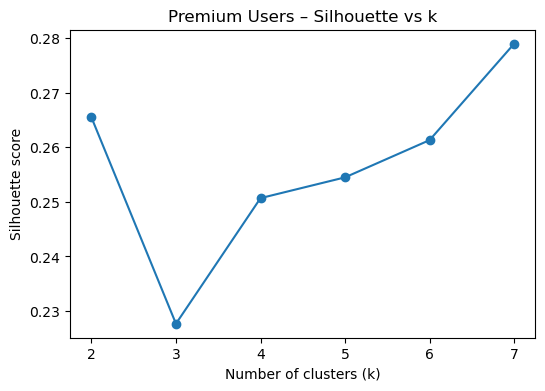

In [28]:
plt.figure(figsize=(6,4))
plt.plot(list(K), sil_scores_prem, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Premium Users – Silhouette vs k")
plt.show()

In [ ]:
#Although K = 7 achieved the highest silhouette score, it produced many small and fragmented clusters that were difficult to interpret. 
#K = 4 also showed a slightly higher score than K = 3, but the additional cluster did not provide meaningful new patterns and made 
#the segmentation less clear. In contrast, K = 3 offers the best balance: the clusters remain well-separated while still 
#being easy to understand, visually distinct, and large enough for practical user profiling. Therefore, K = 3 is recommended 
#as the most interpretable and actionable choice.

In [29]:
k_prem = 3 

kmeans_prem = KMeans(n_clusters = k_prem, n_init = 10, random_state = 42)
prem_labels = kmeans_prem.fit_predict(X_prem)

premium_enc = premium_enc.copy()
premium_enc["Cluster"] = prem_labels

premium_enc["Cluster"].value_counts()


C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster
2    155
0    127
1     75
Name: count, dtype: int64

In [31]:
prem_features = [
    "age",
    "gender",
    "usage_period",
    "will_premium",
    "time_slot",
    "mood",
    "music_context"
]

In [33]:
prem_profile = premium_enc.groupby("Cluster")[prem_features].mean()
prem_profile

,age,gender,usage_period,will_premium,time_slot,mood,music_context
Cluster,,,,,,,
0,1.803150,1.000000,1.283465,0.637795,0.677165,1.346457,2.866142
1,1.946667,0.626667,2.693333,0.933333,1.880000,1.173333,8.000000
2,1.903226,0.496774,2.812903,0.916129,1.961290,1.200000,2.858065


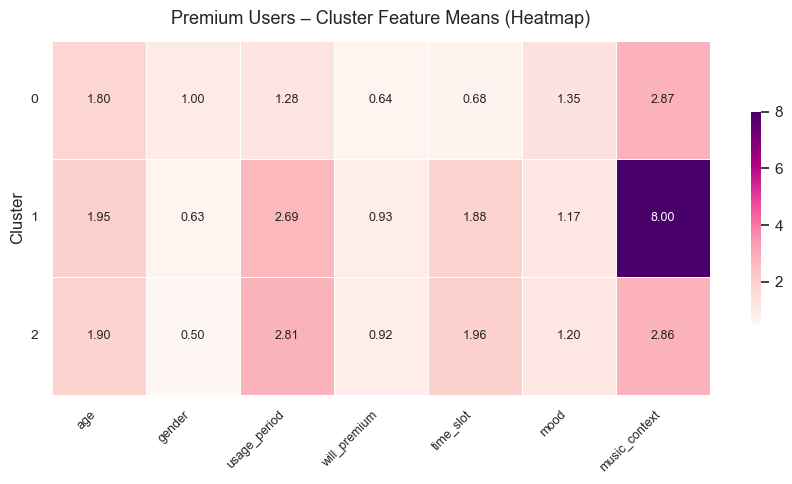

In [35]:
plt.figure(figsize=(9,5))
sns.set_theme(style="white")

ax = sns.heatmap(
    prem_profile,
    annot=True,
    fmt=".2f",
    linewidths=0.7,
    linecolor="white",
    cmap="RdPu",      
    cbar_kws={"shrink": 0.6},
    annot_kws={"size": 9}
)

plt.xticks(fontsize=9, rotation=45, ha="right")
plt.yticks(fontsize=10, rotation=0)
plt.title("Premium Users – Cluster Feature Means (Heatmap)", fontsize=13, pad=12)
plt.tight_layout()
plt.show()


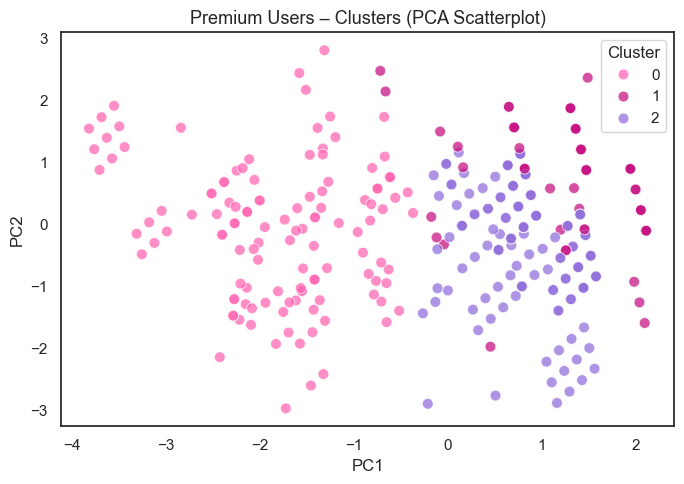

In [48]:
pca_prem = PCA(n_components=2)
prem_pca_2d = pca_prem.fit_transform(X_prem)

prem_pca_df = pd.DataFrame({
    "PC1": prem_pca_2d[:,0],
    "PC2": prem_pca_2d[:,1],
    "Cluster": premium_enc["Cluster"].values
})

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=prem_pca_df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette=["#FF69B4", "#C71585", "#9370DB"],  
    s=60, alpha=0.75
)
plt.title("Premium Users – Clusters (PCA Scatterplot)", fontsize=13)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [37]:
free_features = ["age","gender","usage_period",
                 "will_premium","time_slot","mood","music_context"]

scaler_free = StandardScaler()
X_free = scaler_free.fit_transform(free_enc[free_features])
X_free.shape


(1359, 7)

C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

K values: [2, 3, 4, 5, 6, 7]
Silhouette scores (Free): [np.float64(0.2043730931671968), np.float64(0.20424301417166102), np.float64(0.2042406966461316), np.float64(0.22596217205262842), np.float64(0.22483403960343973), np.float64(0.2332126041268367)]


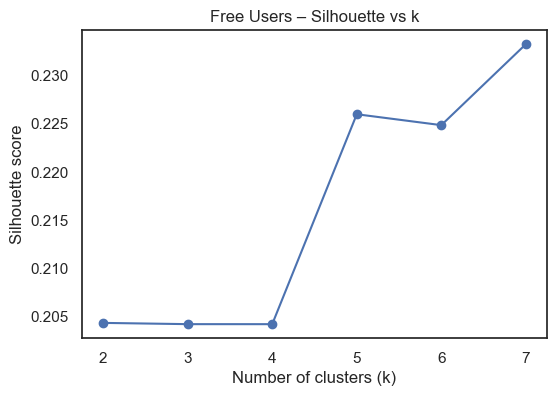

In [38]:
K = range(2, 8)
sil_scores_free = []

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_free)
    score = silhouette_score(X_free, labels)
    sil_scores_free.append(score)

print("K values:", list(K))
print("Silhouette scores (Free):", sil_scores_free)

plt.figure(figsize=(6,4))
plt.plot(list(K), sil_scores_free, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Free Users – Silhouette vs k")
plt.show()


In [39]:
k_free = 3 

kmeans_free = KMeans(n_clusters=k_free, n_init=10, random_state=42)
free_labels = kmeans_free.fit_predict(X_free)

free_enc = free_enc.copy()
free_enc["Cluster"] = free_labels

free_enc["Cluster"].value_counts()


C:\Users\gemaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Cluster
1    781
0    294
2    284
Name: count, dtype: int64

In [42]:
free_profile = free_enc.groupby("Cluster")[free_features].mean()
free_profile

,age,gender,usage_period,will_premium,time_slot,mood,music_context
Cluster,,,,,,,
0,1.962585,0.931973,2.037415,1.000000,1.755102,1.159864,4.435374
1,1.964149,0.825864,1.969270,0.000000,1.952625,0.967990,4.601793
2,1.802817,0.704225,1.580986,0.197183,0.352113,1.049296,3.950704


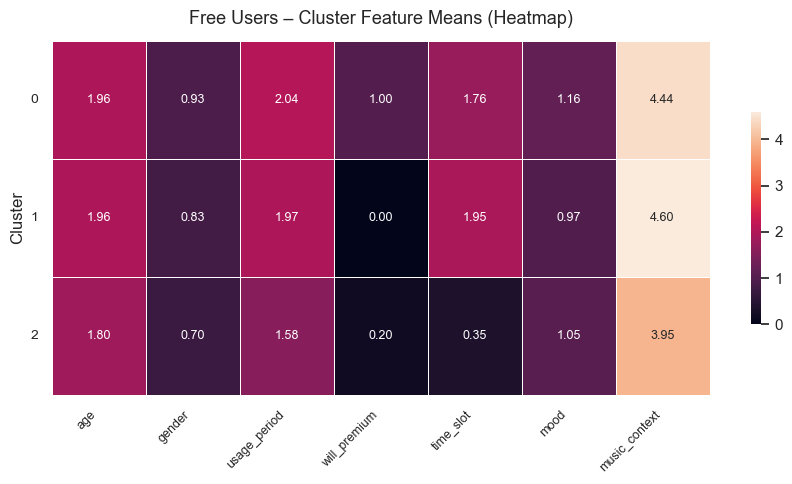

In [43]:
plt.figure(figsize=(9,5))
sns.set_theme(style="white")

ax = sns.heatmap(
    free_profile,
    annot=True,
    fmt=".2f",
    linewidths=0.7,
    linecolor="white",
    cmap="rocket", 
    cbar_kws={"shrink": 0.6},
    annot_kws={"size": 9}
)

plt.xticks(fontsize=9, rotation=45, ha="right")
plt.yticks(fontsize=10, rotation=0)
plt.title("Free Users – Cluster Feature Means (Heatmap)", fontsize=13, pad=12)
plt.tight_layout()
plt.show()


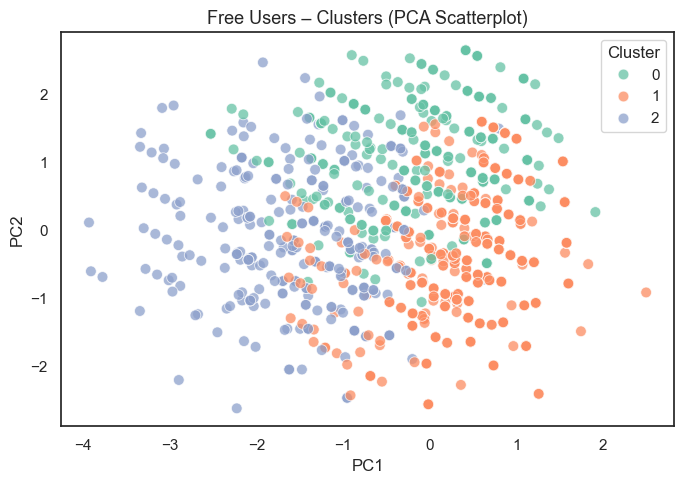

In [47]:
pca_free = PCA(n_components=2)
free_pca_2d = pca_free.fit_transform(X_free)

free_pca_df = pd.DataFrame({
    "PC1": free_pca_2d[:,0],
    "PC2": free_pca_2d[:,1],
    "Cluster": free_enc["Cluster"].values
})

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=free_pca_df,
    x="PC1", y="PC2",
    hue="Cluster",
    palette="Set2",
    s=60, alpha=0.75
)
plt.title("Free Users – Clusters (PCA Scatterplot)", fontsize=13)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
